In [108]:
import pandas as pd

In [109]:
df=pd.read_csv('Downloads/IPL_Dataset.csv')

In [110]:
df.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


## 1. What is the total number of runs scored by each batting team?

In [111]:
total_runs_by_team = df.groupby('batting_team')['total_runs'].sum()
print("Total runs scored by each batting team:\n", total_runs_by_team)

Total runs scored by each batting team:
 batting_team
Chennai Super Kings            20899
Deccan Chargers                11463
Delhi Daredevils               21953
Gujarat Lions                   4862
Kings XI Punjab                23068
Kochi Tuskers Kerala            1901
Kolkata Knight Riders          21965
Mumbai Indians                 24521
Pune Warriors                   6358
Rajasthan Royals               17703
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Royal Challengers Bangalore    23436
Sunrisers Hyderabad            11652
Name: total_runs, dtype: int64


## 2. How many wides have been bowled by each bowling team ?

In [112]:
total_wides_by_team = df.groupby('bowling_team')['wide_runs'].sum()
print("Number of wides bowled by each bowling team:\n", total_wides_by_team)

Number of wides bowled by each bowling team:
 bowling_team
Chennai Super Kings            526
Deccan Chargers                328
Delhi Daredevils               614
Gujarat Lions                  107
Kings XI Punjab                668
Kochi Tuskers Kerala            56
Kolkata Knight Riders          658
Mumbai Indians                 786
Pune Warriors                  174
Rajasthan Royals               586
Rising Pune Supergiant          69
Rising Pune Supergiants         77
Royal Challengers Bangalore    725
Sunrisers Hyderabad            268
Name: wide_runs, dtype: int64


## 3. What is the average number of runs scored per inning by each team?

In [113]:
average_runs_per_inning = df.groupby(['batting_team', 'match_id', 'inning'])['total_runs'].sum().groupby('batting_team').mean()
print("Average number of runs scored per inning by each team:\n", average_runs_per_inning)

Average number of runs scored per inning by each team:
 batting_team
Chennai Super Kings            158.325758
Deccan Chargers                152.840000
Delhi Daredevils               148.331081
Gujarat Lions                  156.838710
Kings XI Punjab                153.786667
Kochi Tuskers Kerala           135.785714
Kolkata Knight Riders          146.433333
Mumbai Indians                 155.196203
Pune Warriors                  141.288889
Rajasthan Royals               147.525000
Rising Pune Supergiant         154.375000
Rising Pune Supergiants        147.357143
Royal Challengers Bangalore    152.181818
Sunrisers Hyderabad            151.324675
Name: total_runs, dtype: float64


## 4. Which batsman has scored the highest number of runs ?

In [114]:
highest_scoring_batsman = df.groupby('batsman')['batsman_runs'].sum().idxmax()
print("Batsman who has scored the highest number of runs:", highest_scoring_batsman)

Batsman who has scored the highest number of runs: SK Raina


## 5. How many dismissals have occurred of each dismissal kind?

In [115]:
dismissal_counts = df['dismissal_kind'].value_counts()
print("Number of dismissals of each dismissal kind:\n", dismissal_counts)

Number of dismissals of each dismissal kind:
 dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64


## 6. What is the total runs scored by each over?

In [116]:
total_runs_by_over = df.groupby(['match_id', 'over'])['total_runs'].sum()
print("Total runs scored by each over:\n", total_runs_by_over)

Total runs scored by each over:
 match_id  over
1         1       18
          2       17
          3       22
          4       19
          5       14
                  ..
636       16      11
          17      19
          18      19
          19      28
          20      33
Name: total_runs, Length: 12582, dtype: int64


## 7. Bowler who has taken the most wickets

In [117]:
most_wickets_bowler = df[df['player_dismissed'].notna()]['bowler'].value_counts().idxmax()
print("Bowler who has taken the most wickets:", most_wickets_bowler)

Bowler who has taken the most wickets: SL Malinga


## 8. How many super overs have been played in total?

In [118]:
total_super_overs = df['is_super_over'].sum()
print("Number of super overs played in total:", total_super_overs)

Number of super overs played in total: 81


## 9. What is the average number of extras (wide runs, bye runs, legbye runs, noball runs, penalty runs) conceded per inning by each bowling team?

In [119]:
average_extras_per_inning = df.groupby(['bowling_team', 'match_id', 'inning'])['extra_runs'].sum().groupby('bowling_team').mean()
print("Average number of extras conceded per inning by each bowling team:\n", average_extras_per_inning)

Average number of extras conceded per inning by each bowling team:
 bowling_team
Chennai Super Kings            7.590909
Deccan Chargers                8.786667
Delhi Daredevils               8.074830
Gujarat Lions                  6.064516
Kings XI Punjab                8.200000
Kochi Tuskers Kerala           7.857143
Kolkata Knight Riders          8.026667
Mumbai Indians                 8.841772
Pune Warriors                  7.282609
Rajasthan Royals               8.743802
Rising Pune Supergiant         6.937500
Rising Pune Supergiants        7.714286
Royal Challengers Bangalore    8.555556
Sunrisers Hyderabad            6.324675
Name: extra_runs, dtype: float64


## 10. How many runs have been scored by each batsman-bowler pair?

In [120]:
runs_by_batsman_bowler_pair = df.groupby(['batsman', 'bowler'])['batsman_runs'].sum()
print("Runs scored by each batsman-bowler pair:\n", runs_by_batsman_bowler_pair)

Runs scored by each batsman-bowler pair:
 batsman         bowler         
A Ashish Reddy  A Nehra             7
                AB Dinda            9
                AD Mathews         25
                AD Russell          4
                Anureet Singh       2
                                   ..
Z Khan          SR Watson           3
                Shakib Al Hasan     3
                Sohail Tanvir       3
                VRV Singh           0
                YK Pathan           1
Name: batsman_runs, Length: 17151, dtype: int64


## 11. What is the most common dismissal kind?

In [121]:
most_common_dismissal = df['dismissal_kind'].mode()[0]
print("Most common dismissal kind:", most_common_dismissal)

Most common dismissal kind: caught


## 12. How many matches have been played by each batting team?

In [122]:
matches_by_team = df.groupby('batting_team')['match_id'].nunique()
print("Number of matches played by each batting team:\n", matches_by_team)

Number of matches played by each batting team:
 batting_team
Chennai Super Kings            131
Deccan Chargers                 75
Delhi Daredevils               147
Gujarat Lions                   30
Kings XI Punjab                148
Kochi Tuskers Kerala            14
Kolkata Knight Riders          148
Mumbai Indians                 157
Pune Warriors                   45
Rajasthan Royals               117
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    152
Sunrisers Hyderabad             76
Name: match_id, dtype: int64


## 13. What is the average number of runs scored in each over?

In [123]:
average_runs_per_over = df.groupby('over')['total_runs'].mean()
print("Average number of runs scored in each over:\n", average_runs_per_over)

Average number of runs scored in each over:
 over
1     0.955635
2     1.121601
3     1.242057
4     1.291698
5     1.298832
6     1.321933
7     1.074869
8     1.149635
9     1.189325
10    1.170981
11    1.233177
12    1.269347
13    1.275509
14    1.313694
15    1.373206
16    1.418031
17    1.495300
18    1.561685
19    1.600031
20    1.707736
Name: total_runs, dtype: float64


## 14. Which fielder has been involved in the most dismissals?

In [124]:
fielder_most_dismissals = df['fielder'].value_counts().idxmax()
print("Fielder involved in the most dismissals:", fielder_most_dismissals)

Fielder involved in the most dismissals: KD Karthik


## 15. How does the number of runs scored vary with the over number?

In [127]:
runs_by_over = df.groupby('over')['total_runs'].sum()
print("Number of runs scored with the over number:\n", runs_by_over)

Number of runs scored with the over number:
 over
1      7733
2      8993
3      9852
4     10207
5     10227
6     10397
7      8413
8      8966
9      9247
10     9047
11     9456
12     9694
13     9713
14     9900
15    10240
16    10397
17    10817
18    10899
19    10469
20     9647
Name: total_runs, dtype: int64


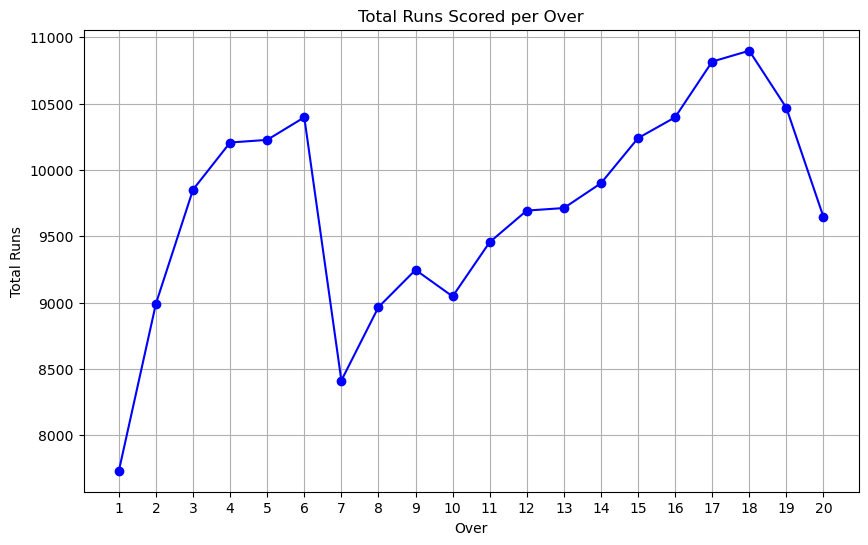

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
runs_per_over = df.groupby('over')['total_runs'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(runs_per_over['over'], runs_per_over['total_runs'], marker='o', linestyle='-', color='b')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored per Over')
plt.grid(True)
plt.xticks(runs_per_over['over'])
plt.show()

## 16. how is the relationship between the number of runs scored and the number of extras conceded?

In [128]:
correlation_runs_extras = df[['total_runs', 'extra_runs']].corr().iloc[0, 1]
print("Correlation between runs scored and extras conceded:", correlation_runs_extras)

Correlation between runs scored and extras conceded: 0.0780851937510607


<Axes: xlabel='total_runs', ylabel='extra_runs'>

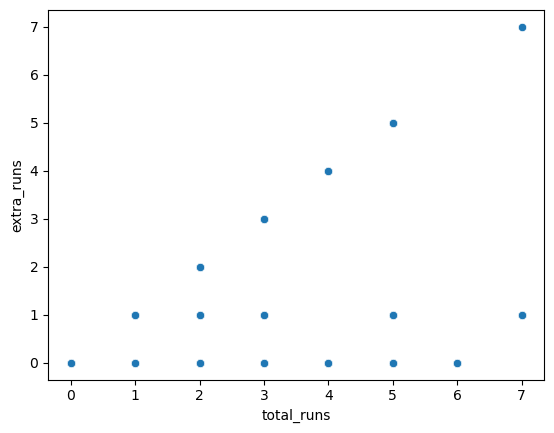

In [83]:
import seaborn as sns 
sns.scatterplot(data=df , x='total_runs' , y='extra_runs') 


## 17. Are there any notable trends in the distribution of runs scored by batting teams across innings?

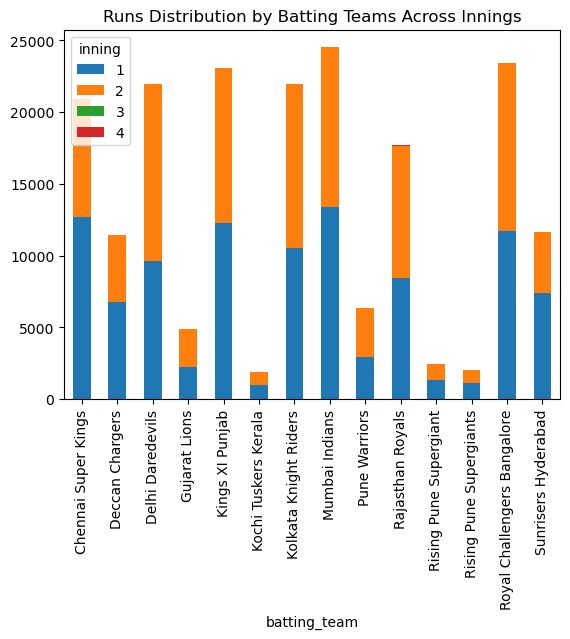

In [129]:
import matplotlib.pyplot as plt

runs_distribution_by_inning = df.groupby(['batting_team', 'inning'])['total_runs'].sum().unstack()
runs_distribution_by_inning.plot(kind='bar', stacked=True, title='Runs Distribution by Batting Teams Across Innings')
plt.show()

## 18. Which batting team has the highest average runs per match?

In [130]:
average_runs_per_match = df.groupby('batting_team')['total_runs'].sum() / df.groupby('batting_team')['match_id'].nunique()
team_highest_avg_runs = average_runs_per_match.idxmax()
print("Batting team with the highest average runs per match:", team_highest_avg_runs)

Batting team with the highest average runs per match: Gujarat Lions


## 19. What is the total runs scored by each batsman?

In [131]:
total_runs_by_batsman = df.groupby('batsman')['batsman_runs'].sum()
print("Total runs scored by each batsman:\n", total_runs_by_batsman)

Total runs scored by each batsman:
 batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Flintoff          62
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2591
Z Khan             117
Name: batsman_runs, Length: 461, dtype: int64


## 20. How does the average number of runs scored per inning vary across different bowling teams?

In [133]:
average_runs_against_team = df.groupby(['bowling_team', 'match_id', 'inning'])['total_runs'].sum().groupby('bowling_team').mean()
print("Average number of runs scored per inning across different bowling teams:\n", average_runs_against_team)

Average number of runs scored per inning across different bowling teams:
 bowling_team
Chennai Super Kings            149.924242
Deccan Chargers                154.906667
Delhi Daredevils               151.993197
Gujarat Lions                  164.193548
Kings XI Punjab                155.133333
Kochi Tuskers Kerala           141.857143
Kolkata Knight Riders          146.900000
Mumbai Indians                 150.854430
Pune Warriors                  149.065217
Rajasthan Royals               147.553719
Rising Pune Supergiant         152.250000
Rising Pune Supergiants        150.928571
Royal Challengers Bangalore    154.392157
Sunrisers Hyderabad            148.896104
Name: total_runs, dtype: float64


## 21. how is the relationship between the number of wides and the number of no balls bowled?

In [134]:
correlation_wides_noballs = df[['wide_runs', 'noball_runs']].corr().iloc[0, 1]
print("Correlation between wides and no balls bowled:", correlation_wides_noballs)

Correlation between wides and no balls bowled: -0.008702741691253043


<Axes: xlabel='noball_runs', ylabel='wide_runs'>

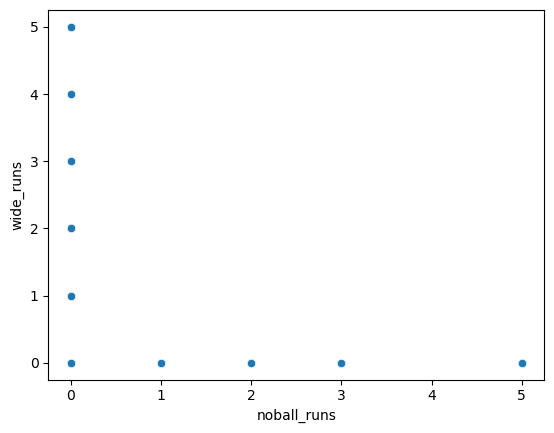

In [89]:
sns.scatterplot(data=df , x='noball_runs', y='wide_runs') 

## 22. Which batting team has the highest number of centuries?

In [138]:
df1=df.groupby('batting_team')['total_runs'].sum()
df1=df1[df1>=100]
df1.groupby('batting_team').sum().head(1) 

batting_team
Chennai Super Kings    20899
Name: total_runs, dtype: int64

## 23. How does the number of wides vary with the over number?

In [142]:
wides_by_over = df.groupby('over')['wide_runs'].sum()
print("Number of wides with the over number:\n", wides_by_over)

Number of wides with the over number:
 over
1     481
2     442
3     359
4     295
5     279
6     307
7     330
8     261
9     255
10    227
11    182
12    220
13    241
14    224
15    248
16    254
17    264
18    271
19    264
20    238
Name: wide_runs, dtype: int64


## 24. What is the average number of runs scored per inning in matches with a super over ?

In [143]:
average_runs_super_over = df[df['is_super_over'] == 1].groupby(['match_id', 'inning'])['total_runs'].sum().mean()
print("Average number of runs scored per inning in matches with a super over:", average_runs_super_over)

Average number of runs scored per inning in matches with a super over: 12.357142857142858


## 25. How does the number of extras vary with the over number?

In [146]:
extras_by_over = df.groupby('over')['extra_runs'].sum()
print("Number of extras with the over number:\n", extras_by_over)

Number of extras with the over number:
 over
1     768
2     730
3     629
4     562
5     495
6     582
7     553
8     465
9     459
10    437
11    379
12    395
13    451
14    426
15    425
16    458
17    548
18    531
19    527
20    565
Name: extra_runs, dtype: int64


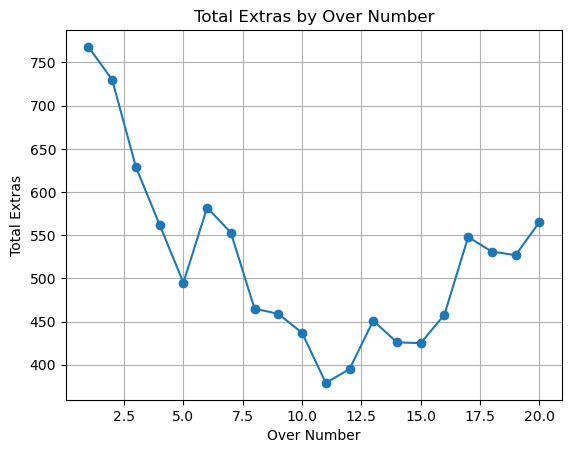

In [56]:
extras_numbers = df.groupby('over')['extra_runs'].sum().reset_index()
plt.plot(extras_numbers['over'], extras_numbers['extra_runs'], marker='o')
plt.xlabel('Over Number')
plt.ylabel('Total Extras')
plt.title('Total Extras by Over Number')
plt.grid(True)
plt.show()

## 26. Which bowler has the highest economy rate?

In [147]:
total_runs_conceded_by_bowler = df.groupby('bowler')['total_runs'].sum()
total_overs_bowled_by_bowler = df.groupby('bowler')['over'].nunique()
economy_rate_by_bowler = total_runs_conceded_by_bowler / total_overs_bowled_by_bowler
highest_economy_bowler = economy_rate_by_bowler.sort_values(ascending=False).head(1)
print("Bowler with the highest economy rate:", highest_economy_bowler)

Bowler with the highest economy rate: bowler
PP Chawla    174.473684
dtype: float64


## 27. How does the number of dismissals vary across different dismissal kinds?

In [148]:
dismissals_by_kind = df['dismissal_kind'].value_counts()
print("Number of dismissals by different dismissal kinds:\n", dismissals_by_kind)

Number of dismissals by different dismissal kinds:
 dismissal_kind
caught                   4373
bowled                   1382
run out                   755
lbw                       455
stumped                   243
caught and bowled         211
retired hurt                9
hit wicket                  9
obstructing the field       1
Name: count, dtype: int64


## 28. What is the distribution of runs scored by each batting team in super overs

In [149]:
runs_super_over_by_team = df[df['is_super_over'] == 1].groupby('batting_team')['total_runs'].sum()
print("Distribution of runs scored by each batting team in super overs:\n", runs_super_over_by_team)

Distribution of runs scored by each batting team in super overs:
 batting_team
Chennai Super Kings             9
Delhi Daredevils               11
Gujarat Lions                   6
Kings XI Punjab                25
Kolkata Knight Riders          26
Mumbai Indians                 11
Rajasthan Royals               35
Royal Challengers Bangalore    30
Sunrisers Hyderabad            20
Name: total_runs, dtype: int64
